In [2]:
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
import numpy as np

In [3]:
clean_df = pd.read_csv("CleanDataset\clean_data.csv")
clean_df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,2019-03-01 04:17:00,3,0,10,10,9,10,7,3,2,...,8,0,2,1,6,3,10,Less than 20,Female,699.1
1,2019-03-02 22:26:00,2,3,7,7,1,5,4,0,2,...,7,4,0,2,10,1,4,51 or more,Female,636.3
2,2019-03-03 03:06:00,5,2,5,3,4,3,4,0,1,...,3,0,3,2,5,5,10,36 to 50,Female,676.5
3,2019-03-03 12:20:00,1,5,6,5,10,4,2,4,1,...,6,6,2,1,6,1,7,36 to 50,Female,631.4
4,2019-03-04 00:48:00,2,4,10,3,3,1,1,4,1,...,9,10,2,1,1,1,5,21 to 35,Female,600.8


In [26]:
minimized_df = clean_df[["TODO_COMPLETED", "SLEEP_HOURS", "WORK_LIFE_BALANCE_SCORE"]]
minimized_df

,TODO_COMPLETED,SLEEP_HOURS,WORK_LIFE_BALANCE_SCORE
0,0,8,699.1
1,6,7,636.3
2,5,3,676.5
3,3,6,631.4
4,2,9,600.8
...,...,...,...
5543,8,7,644.5
5544,7,6,714.9
5545,7,7,716.6
5546,6,8,682.0


In [27]:
sum_sleep = minimized_df[["TODO_COMPLETED", "SLEEP_HOURS"]].groupby("SLEEP_HOURS").sum()
sum_sleep

,TODO_COMPLETED
SLEEP_HOURS,
1,11
2,37
3,37
4,358
5,1888
6,6834
7,11798
8,9144
9,1802


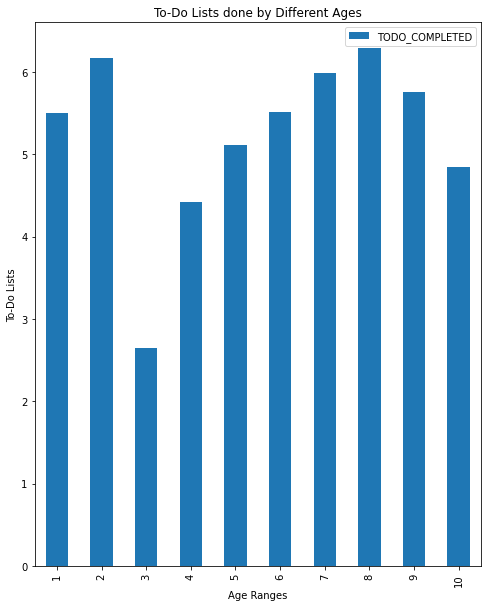

In [28]:
mean_sleep = minimized_df[["TODO_COMPLETED", "SLEEP_HOURS"]].groupby("SLEEP_HOURS").mean()
mean_sleep.plot(kind = "bar", figsize = (8, 10))
mean_sleep
plt.title("To-Do Lists done by Different Ages")
plt.xlabel("Age Ranges")
plt.ylabel("To-Do Lists")
plt.savefig("ToDoAge.png")
plt.show()

In [30]:
mean_sleep.head(10)

,TODO_COMPLETED
SLEEP_HOURS,
1,5.500000
2,6.166667
3,2.642857
4,4.419753
5,5.116531
6,5.506849
7,5.979726
8,6.284536
9,5.757188


In [31]:
todo = minimized_df.groupby(["TODO_COMPLETED"])
todo.head()

,TODO_COMPLETED,SLEEP_HOURS,WORK_LIFE_BALANCE_SCORE
0,0,8,699.1
1,6,7,636.3
2,5,3,676.5
3,3,6,631.4
4,2,9,600.8
5,1,9,588.9
6,1,9,605.9
7,2,5,648.0
8,7,7,647.9
9,3,7,693.8


In [32]:
avg_bal = todo["WORK_LIFE_BALANCE_SCORE"].mean()
avg_bal.head()

TODO_COMPLETED
0    611.663190
1    619.455385
2    632.318694
3    641.397516
4    644.766955
Name: WORK_LIFE_BALANCE_SCORE, dtype: float64

In [33]:
todo_bal = pd.DataFrame(avg_bal)
todo_bal.head()

,WORK_LIFE_BALANCE_SCORE
TODO_COMPLETED,
0,611.663190
1,619.455385
2,632.318694
3,641.397516
4,644.766955


C:\Users\zac\AppData\Local\Temp\ipykernel_17208\646522557.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid (b=True, which = "major", axis="both", linestyle="-", color = "black")


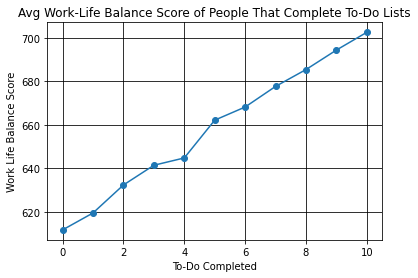

In [35]:
plt.plot(todo_bal, marker = "o")
plt.title("Avg Work-Life Balance Score of People That Complete To-Do Lists")
plt.xlabel("To-Do Completed")
plt.ylabel("Work Life Balance Score")
plt.grid (b=True, which="major", axis="both", linestyle="-", color="black")
plt.savefig("ToDoWLB")
plt.show()